In [1659]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [1660]:
House_Data =pd.read_csv("data.csv")
House_Data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [1661]:
House_Data["date"] = pd.to_datetime(House_Data["date"])

In [1662]:
House_Data["year"] = House_Data["date"].dt.year
House_Data["mounth"] = House_Data["date"].dt.month
House_Data["day"] = House_Data["date"].dt.day

House_Data.drop(["date"] , axis=  1 , inplace = True)

In [1663]:
House_Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,mounth,day
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7,9
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7,9
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7,9
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7,10


### Show info in data

In [1664]:
House_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  year           4600 non-null   int32  
 18  mounth  

In [1665]:
House_Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,mounth,day
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2


In [1666]:
# House_Data["city"].value_counts()

### Find duplicate

In [1667]:
House_Data.duplicated().value_counts()

False    4600
Name: count, dtype: int64

### Find null 

In [1668]:
print(House_Data.isna().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
mounth           0
day              0
dtype: int64


In [1669]:
print(House_Data["year"].mean() > 50) 

True


### Normlized

In [1670]:
normalized_col =[]
for col in House_Data.columns:
    if(House_Data[col].dtype == "float64" or House_Data[col].dtype== "int64" or House_Data[col].dtype== "float32" or House_Data[col].dtype== "int32"):
        if House_Data[col].mean() > 50: 
            normalized_col.append(col)
normalized_col.remove("price")
normalized_col.remove("year")
normalized_col.remove("yr_built")
normalized_col.remove("yr_renovated")
print(normalized_col)

['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']


### One hot enconding 

In [1671]:
def get_ObjectType(data):
    colTypeObject=[]
    for col in data.columns:
          if(House_Data[col].dtype =="object"):
              colTypeObject.append(col)
    return colTypeObject

In [1672]:
def Converte_ObjectFeature_To_int(data):
    Col_ObjectType = get_ObjectType(data)
    for col in Col_ObjectType:
        one_hot=pd.get_dummies(data[col])
        data[col]=one_hot.values.argmax(axis=1)

In [1673]:
Converte_ObjectFeature_To_int(House_Data)

In [1674]:
House_Data['floors']=np.floor(House_Data['floors'])
House_Data['bathrooms']=np.floor(House_Data['bathrooms'])

In [1675]:
House_Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,mounth,day
0,313000.0,3.0,1.0,1340,7912,1.0,0,0,3,1340,0,1955,2005,1522,36,62,0,2014,5,2
1,2384000.0,5.0,2.0,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0,2014,5,2
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0,2014,5,2
3,420000.0,3.0,2.0,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0,2014,5,2
4,550000.0,4.0,2.0,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0,2014,5,2


### Split data to target and features

In [1676]:
y = pd.DataFrame(House_Data["price"])
X=House_Data.drop("price",axis=1)

### Split data to train and test


In [1677]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1678]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,mounth,day
2195,3.0,1.0,1290,1286,3.0,0,0,3,1290,0,2000,0,3302,35,47,0,2014,6,10
631,3.0,1.0,1700,4400,1.0,0,0,4,1700,0,1906,1990,243,35,59,0,2014,5,14
3670,3.0,2.0,2600,4506,2.0,0,0,3,2600,0,2003,0,950,17,16,0,2014,6,30
1958,3.0,2.0,1680,8424,1.0,0,0,3,1680,0,1993,0,3901,12,12,0,2014,6,5
3284,4.0,3.0,4250,8570,2.0,0,0,3,4250,0,2004,2003,3481,3,3,0,2014,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,3.0,2.0,1810,4592,2.0,0,0,3,1810,0,1992,0,2243,16,17,0,2014,7,8
4171,4.0,2.0,2910,18700,1.0,0,0,3,2210,700,1957,1995,4180,36,70,0,2014,7,9
599,3.0,2.0,2450,42180,1.0,0,0,4,2450,0,1978,2000,1302,9,26,0,2014,5,13
1361,4.0,2.0,1982,6406,2.0,0,0,3,1982,0,2004,2003,2326,18,18,0,2014,5,27


In [1679]:
X_train[normalized_col]= np.log(X_train[normalized_col]+10e-3)
X_test[normalized_col]= np.log(X_test[normalized_col]+10e-3)

### corr

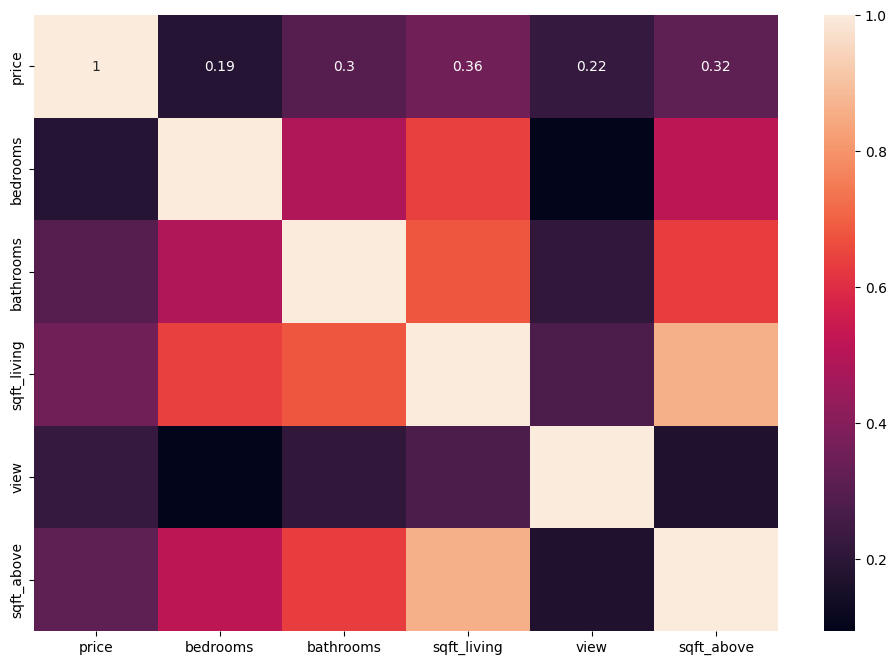

In [1680]:
all_data = pd.concat([y_train,X_train],axis=1)
corr=all_data.corr()
top_feature = corr.index[abs(corr['price'])>0.15]
plt.subplots(figsize=(12, 8))
top_corr = all_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [1681]:
top_corr = top_corr.drop("price",axis=1)

In [1682]:
X_train = X_train[top_corr.columns]
X_test = X_test[top_corr.columns]

## Models

In [1683]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


### Linear Model

In [1684]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [1685]:
linear_predict  = linear_model.predict(X_test)
# meanError = mean_squared_error(y_test ,  linear_predict)
# print("mean_squared_error is : " ,meanError)
print("R_squared score for linear regression: ",r2_score(y_true=y_test , y_pred=linear_predict))

R_squared score for linear regression:  0.2259966018517614


### Decision Tree Regressor

In [1686]:
Decision_Model = DecisionTreeRegressor(random_state=42 , max_depth=3)
Decision_Model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [1687]:
Decision_TrainPred = Decision_Model.predict(X_train)
# train_mse = mean_squared_error(y_train, Decision_TrainPred)
# print("Train MSE:", train_mse)

Decision_TestPred = Decision_Model.predict(X_test)
# test_mse = mean_squared_error(y_test, Decision_TestPred)
# print("Testing MSE:", test_mse)

r2 = r2_score(y_test, Decision_TestPred)
print("R-squared Score for Decision Tree Regression:", r2)

R-squared Score for Decision Tree Regression: 0.2509924560735778


### Gradient Boosting Regressor

In [1688]:

GradientBoosting_model = GradientBoostingRegressor( learning_rate=0.03, max_depth=2, random_state=42)

GradientBoosting_model.fit(X_train, y_train)


c:\Users\Hafez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.03, max_depth=2, random_state=42)

In [1689]:

GradientBoosting_TrainPred = GradientBoosting_model.predict(X_train)
# train_mse = mean_squared_error(y_train, GradientBoosting_TrainPred)
# print("Train MSE:", train_mse)

GradientBoosting_TestPred = GradientBoosting_model.predict(X_test)
# test_mse = mean_squared_error(y_test, GradientBoosting_TestPred)
# print("Testing MSE:", test_mse)

r2 = r2_score(y_test, GradientBoosting_TestPred)
print("R-squared Score for Gradient Boosting Regression:", r2)

R-squared Score for Gradient Boosting Regression: 0.26967126762224136


### RandomForest Regressor

In [1690]:

RandomForest_model = RandomForestRegressor(n_estimators=50,random_state=42 ,max_depth=3)

RandomForest_model.fit(X_train, y_train)



c:\Users\Hafez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=3, n_estimators=50, random_state=42)

In [1691]:

RandomForest_TrainPred = RandomForest_model.predict(X_train)
# train_mse = mean_squared_error(y_train, RandomForest_TrainPred)
# print("train MSE:", train_mse)

RandomForest_TestPred = RandomForest_model.predict(X_test)
# test_mse = mean_squared_error(y_test, RandomForest_TestPred)
# print("Testing MSE:", test_mse)


r2 = r2_score(y_test, RandomForest_TestPred)
print("R-squared Score for RandomForest:", r2)


R-squared Score for RandomForest: 0.26859893622019426


In [1692]:
models = ["linear_model","Decision_Model","GradientBoosting_model","RandomForest_model"]
R2_score = [r2_score(y_test, linear_predict),r2_score(y_test, Decision_TestPred),r2_score(y_test, GradientBoosting_TestPred),r2_score(y_test, RandomForest_TestPred)]


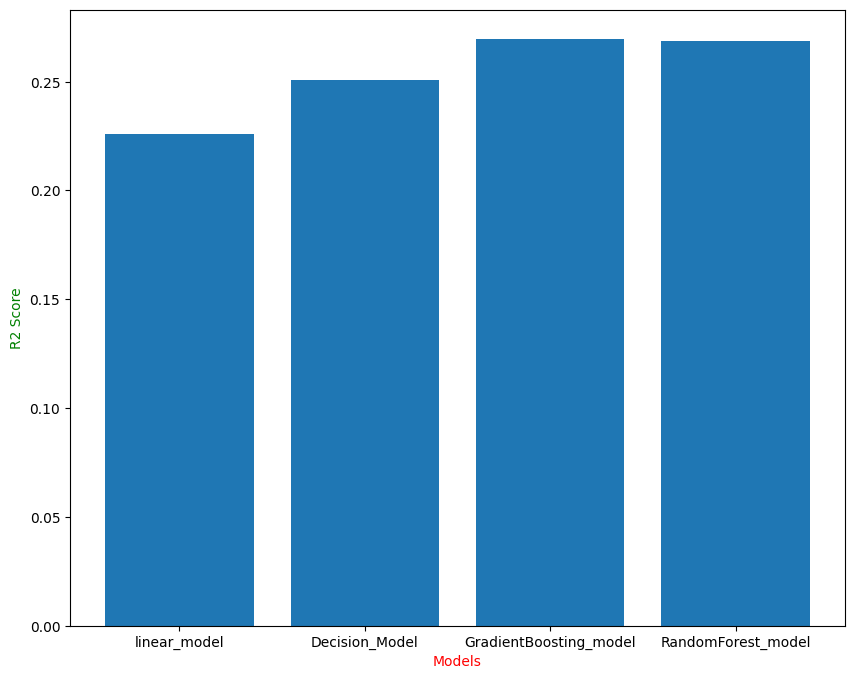

In [1700]:
plt.figure(figsize=(10,8))
plt.bar(models,R2_score)
plt.xlabel("Models" , color="red")
plt.ylabel("R2 Score",color="green")
plt.show()